<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats

In [ ]:
# Reading data:
customers = pd.read_csv("customers.csv")
items = pd.read_csv("order_items.csv")
payments = pd.read_csv("order_payments.csv")
reviews = pd.read_csv("order_reviews.csv", quoting=3, error_bad_lines=False)
orders = pd.read_csv("orders.csv")

b'Skipping line 18: expected 7 fields, saw 8\nSkipping line 19: expected 7 fields, saw 8\nSkipping line 38: expected 7 fields, saw 8\nSkipping line 40: expected 7 fields, saw 8\nSkipping line 42: expected 7 fields, saw 8\nSkipping line 44: expected 7 fields, saw 8\nSkipping line 53: expected 7 fields, saw 8\nSkipping line 71: expected 7 fields, saw 8\nSkipping line 73: expected 7 fields, saw 8\nSkipping line 77: expected 7 fields, saw 10\nSkipping line 85: expected 7 fields, saw 8\nSkipping line 86: expected 7 fields, saw 8\nSkipping line 123: expected 7 fields, saw 8\nSkipping line 124: expected 7 fields, saw 8\nSkipping line 149: expected 7 fields, saw 8\nSkipping line 165: expected 7 fields, saw 9\nSkipping line 167: expected 7 fields, saw 8\nSkipping line 172: expected 7 fields, saw 9\nSkipping line 194: expected 7 fields, saw 9\nSkipping line 198: expected 7 fields, saw 8\nSkipping line 204: expected 7 fields, saw 9\nSkipping line 212: expected 7 fields, saw 8\nSkipping line 215: 

In [ ]:
print("Customers database contains", customers.shape[0], "rows and", customers.shape[1], "columns.")
customers.head()

Customers database contains 99441 rows and 5 columns.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
cust = customers["customer_unique_id"].nunique()
print("Number of unique customers:",cust)

Number of unique customers: 96096


There are 4119 unique cities in the database. The TOP 10 cities are:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

TOP 10 cities covers 35.2 percent of all the orders.


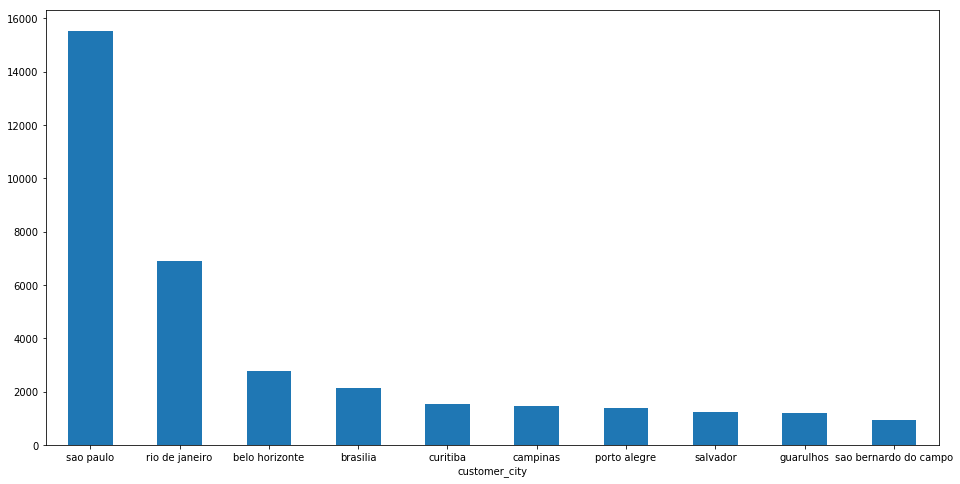

In [ ]:
cities = customers["customer_city"].nunique()
c1 = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database. The TOP 10 cities are:")
c2 = c1.head(10)
print(c2)
print("\nTOP 10 cities covers", round(c2.sum()/customers.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

In [ ]:
zips = customers.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False)
print("Products were delivered the most frequently,",zips.iloc[0],"times, to the", zips.index[0], "zip code.")

Products were delivered the most frequently, 142 times, to the 22790 zip code.


In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,16,228.46
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,2,56.10
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,2,151.13
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,16,247.89
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,4,295.44


In [ ]:
payments["payment_value"].describe()

count    103886.000000
mean        354.431350
std         500.236339
min           0.000000
25%         130.620000
50%         230.000000
75%         395.225000
max       31427.380000
Name: payment_value, dtype: float64

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#orders.dtypes
orders_mod = orders.copy()
orders_mod["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod.dtypes
#new.head()

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

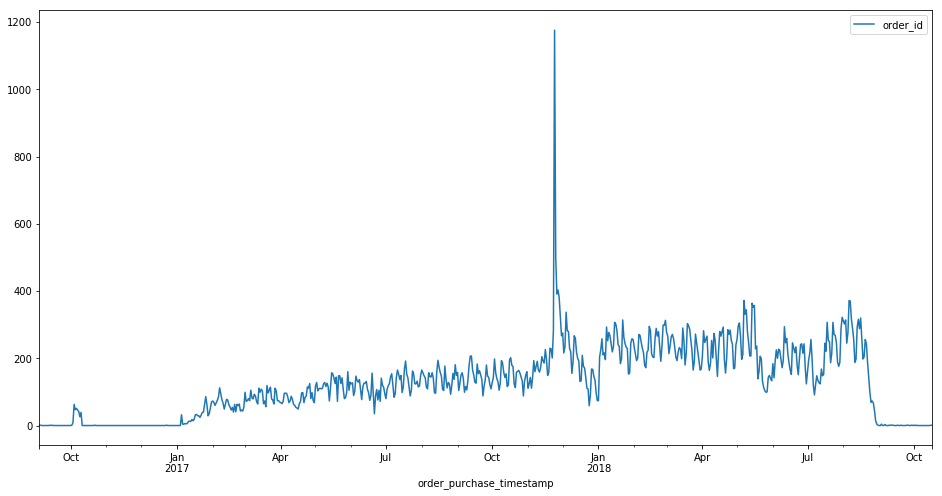

In [ ]:
# From the graph above we can see that there is a peak in the region of Christmas.
counts = orders_mod.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

In [ ]:
print(payments.describe())
print(payments["payment_type"].value_counts())
credit = payments[payments["payment_type"]=="credit_card"]

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              5.706698     354.431350
std              0.706584              5.374101     500.236339
min              1.000000              0.000000       0.000000
25%              1.000000              2.000000     130.620000
50%              1.000000              2.000000     230.000000
75%              1.000000              8.000000     395.225000
max             29.000000             48.000000   31427.380000
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


Text(0.5, 1.0, 'Histogram of installments count')

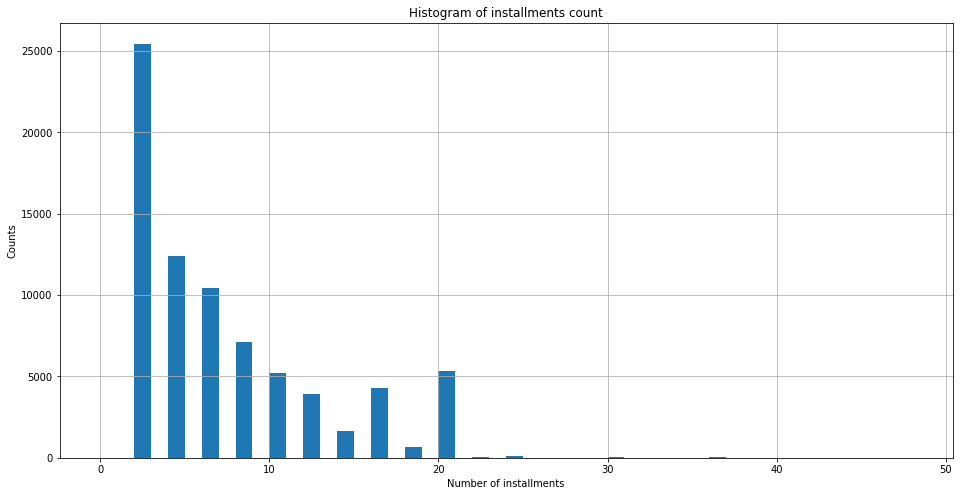

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
credit.hist(column = "payment_installments", bins = credit["payment_installments"].max(), ax=ax)
plt.xlabel("Number of installments")
plt.ylabel("Counts")
plt.title("Histogram of installments count")

Text(0.5, 1.0, 'Histogram of payments values (cut at 95th quantile)')

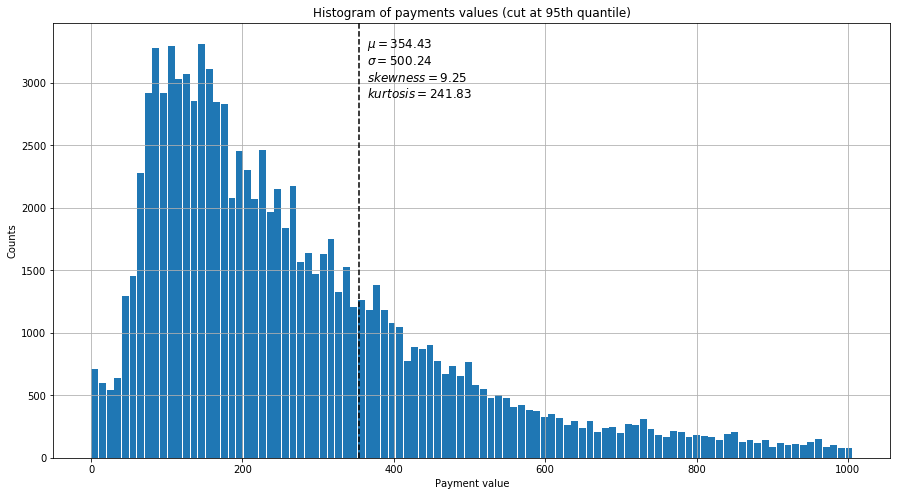

In [ ]:
mean = payments["payment_value"].mean()
std = payments["payment_value"].std()
skew = payments["payment_value"].skew()
kurt = payments["payment_value"].kurtosis()

text1 = '$\mu=$' + str(round(mean,2))
text2 = '$\sigma=$' +str(round(std,2))
text3 = '$skewness=$' + str(round(skew,2))
text4 = '$kurtosis=$' + str(round(kurt,2))
text = text1 + "\n" + text2 + "\n" + text3 + "\n" + text4

q95 = payments["payment_value"].quantile(.95)
payments_q95 = payments[payments["payment_value"]<q95]

payments_q95.hist(column = "payment_value", bins = 100, figsize=(15,8), rwidth=0.9)
plt.axvline(mean, color='k', linestyle='--')
plt.text(mean+10, 2900, text, fontsize=12)
plt.xlabel("Payment value")
plt.ylabel("Counts")
plt.title("Histogram of payments values (cut at 95th quantile)")

Text(0, 0.5, '')

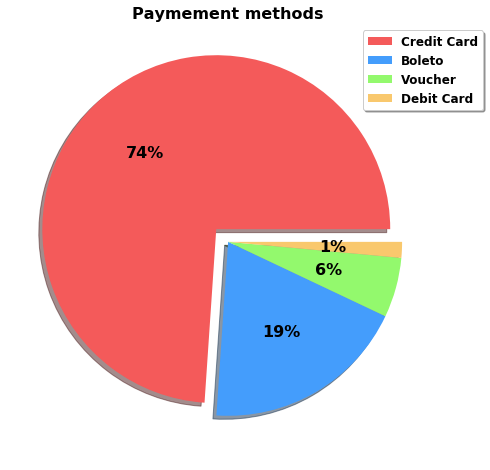

In [ ]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0)
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Credit Card", "Boleto", "Voucher", "Debit Card"]

p = payments["payment_type"][payments["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Paymement methods", fontweight='bold', size=16)
plt.ylabel("")

In [ ]:
print(orders.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [ ]:
# ANALYSIS OF DELIVERY TIMES
# Data preparation
def convert(db,columns_list):
    for column in columns_list:
        db[column] = pd.to_datetime(db[column])

orders_mod = orders.copy()
cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

convert(orders_mod,cols)
orders_mod['delivery_time'] = orders_mod['order_delivered_carrier_date'] - orders_mod['order_purchase_timestamp']
q95 = orders_mod['delivery_time'].quantile(.95)

delivered = orders_mod[orders_mod["order_status"]=="delivered"]
delivered.set_index(delivered['order_purchase_timestamp'], inplace = True)

delivered = delivered.sort_index()
delivered["dts"] = delivered["delivery_time"].dt.total_seconds()
delivered = delivered["dts"].resample("D").mean()
delivered = round(delivered/86400,2)
delivered = delivered[delivered<8]
print(delivered.describe())
m_del = delivered.mean()

count    603.000000
mean       3.252405
std        0.855460
min        0.230000
25%        2.655000
50%        3.170000
75%        3.770000
max        6.480000
Name: dts, dtype: float64


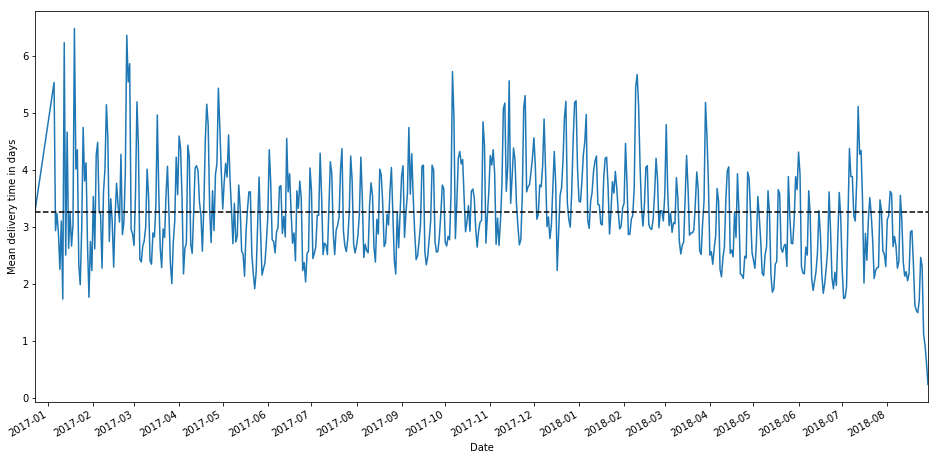

In [ ]:
ax = delivered.plot(figsize=(16,8))
plt.axhline(m_del,color="k",linestyle='--')
plt.xlabel("Date")
plt.ylabel("Mean delivery time in days")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

Text(1, 30, '$\\mu=$-0.0\n$\\sigma=$0.86\n$skewness=$0.52\n$kurtosis=$0.85')

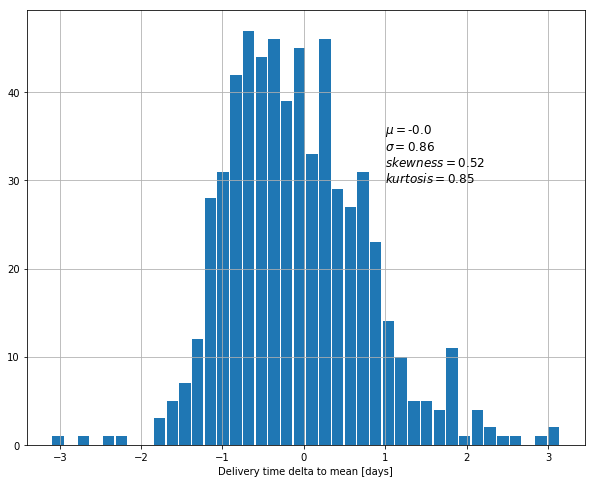

In [ ]:
deltas = delivered - m_del
ax1 = plt.subplots(figsize=(10, 8))
deltas.hist(bins=40, align="left", rwidth=0.9)
plt.rcParams["figure.figsize"] = (5,4)
plt.xlabel("Delivery time delta to mean [days]")
text1 = '$\mu=$' + str(round(deltas.mean(),2))
text2 = '$\sigma=$' +str(round(deltas.std(),2))
text3 = '$skewness=$' + str(round(deltas.skew(),2))
text4 = '$kurtosis=$' + str(round(deltas.kurt(),2))
text = text1 + "\n" + text2 + "\n" + text3 + "\n" + text4
plt.text(1,30,text, fontsize=12)

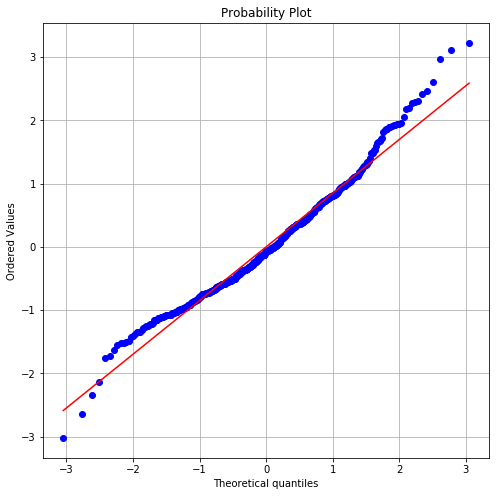

In [ ]:
#Is this a normal distribution?
ax1 = plt.subplots(figsize=(8, 8))
res = stats.probplot(deltas, dist="norm", plot=plt)
plt.grid(True)